# Armado de bases para la aplicación web de habilitaciones comerciales  

In [1]:
# librerias necesarias para la ejecución del código
import pandas as pd
import numpy as np
import geopandas as gpd
import json

El armado de las bases consta de tres inputs: el dataset `Lista de Actividades.xlsx` que contiene información de los distritos, y las parcelas habilitadas; el dataset `Actividades Nueva y _ Paquete.xlsx` que contiene la lista de actividades productivas, con la documentación requerida para habilitar un local, basado en su rubro; la base `Paquetes de documentación.xlsx` que tiene la descripción de cada documento o trámite necesario según el rubro en cuestión y; la base `secciones_unificado.geojson` que contiene los polígonos de cada parcela de la ciudad de Posadas.

En primer lugar, simplemente cargamos la base `.geojson` para ver que la misma se grafique adecuadamente. Luego, pasamos al procesamiento de las bases necesarias, mencionadas anteriormente. En este notebook, los archivos crudos a procesar se encuentran en la carpeta `inputs`, y cuyas bases resultantes del procesamiento se van a guardar en la carpeta `mapa/data/`.  

<Axes: >

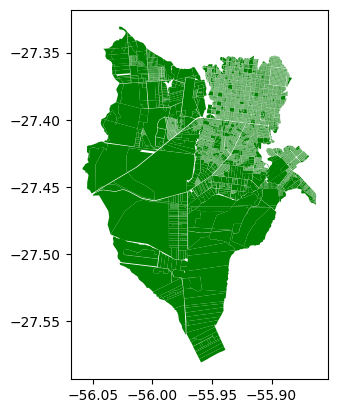

In [ ]:
# carga de base geojson
geodf = gpd.read_file('secciones_unificado.geojson')
# visualización
geodf.plot(color='green')

En el caso de la lista de actividades, la base se carga porque nos dice si la parcela se encuentra habilitada o no, a su vez nos indica su distrito de procedencia. Por lo que se carga la base y se filtran las filas habilitadas.

In [3]:
# cargar base de actividades IDGIS
sectoresIDGIS = pd.read_excel('inputs/Lista de Actividades.xlsx')
sectoresIDGIS = sectoresIDGIS.loc[(sectoresIDGIS['HABILITADO']=='SI'),:]
sectoresIDGIS

,Bases,ZONA,COD,DISTRITO,HABILITADO,Clasificación 1,Sub Cla 1,Sub Cla 2,Actividad,Código,Actividad Nueva
0,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.17,SI,1.RESIDENCIA,1.PERMANENTE,1.VIVIENDA INDIVIDUAL,Vivienda Unifamiliar,11101.0,Vivienda Unifamiliar
1,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.18,SI,1.RESIDENCIA,1.PERMANENTE,1.VIVIENDA INDIVIDUAL,Vivienda Unifamiliar,11101.0,Vivienda Unifamiliar
2,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.19,SI,1.RESIDENCIA,1.PERMANENTE,1.VIVIENDA INDIVIDUAL,Vivienda Unifamiliar,11101.0,Vivienda Unifamiliar
3,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.20,SI,1.RESIDENCIA,1.PERMANENTE,1.VIVIENDA INDIVIDUAL,Vivienda Unifamiliar,11101.0,Vivienda Unifamiliar
4,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.21,SI,1.RESIDENCIA,1.PERMANENTE,1.VIVIENDA INDIVIDUAL,Vivienda Unifamiliar,11101.0,Vivienda Unifamiliar
...,...,...,...,...,...,...,...,...,...,...,...
96062,Actividades Frente Fluvial,ITAEMBE,ABR1.1,ABR1.1,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación transformadora,81607.0,Estación transformadora
96066,Actividades Frente Fluvial,COSTA OESTE,ABR1.2,ABR1.2,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación transformadora,81607.0,Estación transformadora
96067,Actividades Frente Fluvial,COSTA OESTE,ABR1.3,ABR1.3,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación transformadora,81607.0,Estación transformadora
96068,Actividades Frente Fluvial,COSTA OESTE,ABR1.4,ABR1.4,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación transformadora,81607.0,Estación transformadora


Luego, se carga la segunda base que contiene las actividades productivas que se unirán a cada parcela de la base anterior, a partir del código.

In [4]:
# cargar base de actividades
sectores = pd.read_excel('inputs/Actividad Nueva y _ Paquete.xlsx')
sectores

,NAEM,Concepto,RIESGO,Código,ENLACE con COD URBANISMO (1),ENLACE con COD URBANISMO (2),PAQUETE DE DOC REQUERIDA,Sin local,Estado
0,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar
1,11112,Cultivo de trigo,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar
2,11119,"Cultivo de cereales n.c.p., excepto los de uso...",Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar
3,11121,Cultivo de maíz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar
4,11129,Cultivo de cereales de uso forrajero n.c.p.,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar
...,...,...,...,...,...,...,...,...,...
1399,471110A,"Venta al por menor en hipermercados. (Grupo 3,...",Alto,51507,51507_ Supermercado y centro de compras (grupo...,NaN,AR-46,NO,Agregar
1400,471120,Venta al por menor en supermercados,Alto,51506,51506_ Supermercado y centro de compras (grupo...,NaN,AR-21,NO,NaN
1401,471122,Venta al por menor en Supermercados con sup ma...,Alto,51509,51509_ Supermercado y centro de compras (grupo...,NaN,AR-47,NO,NaN
1402,471120B,"Venta al por menor en supermercados. (Grupo 3,...",Alto,51507,51507_ Supermercado y centro de compras (grupo...,NaN,AR-46,NO,Agregar


Antes de unir las bases revisamos que las variables códigos se tomen bien en cada base. Si en ambas bases el mismo código se filtra bien, quiere decir que en el `merge()` no va a haber ningún problema de incompatibilidad.

In [5]:
# tomamos un valor a modo de ejemplo
sectoresIDGIS.loc[sectoresIDGIS['Código']==81606,:]

,Bases,ZONA,COD,DISTRITO,HABILITADO,Clasificación 1,Sub Cla 1,Sub Cla 2,Actividad,Código,Actividad Nueva
59725,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.17,SI,8.INFRAESTRUCTURA,1.INFRAESTRUCTURA,6.SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
59726,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.18,SI,8.INFRAESTRUCTURA,1.INFRAESTRUCTURA,6.SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
59727,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.19,SI,8.INFRAESTRUCTURA,1.INFRAESTRUCTURA,6.SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
59728,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.20,SI,8.INFRAESTRUCTURA,1.INFRAESTRUCTURA,6.SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
59729,Unidades Territoriales,ESTE,AU1-(17 a 21),AU1.21,SI,8.INFRAESTRUCTURA,1.INFRAESTRUCTURA,6.SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
...,...,...,...,...,...,...,...,...,...,...,...
96057,Actividades Frente Fluvial,ZAIMAN BAJO,FU1.6,FU1.6,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
96058,Actividades Frente Fluvial,ZAIMAN BAJO,FU1.7,FU1.7,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
96059,Actividades Frente Fluvial,ZAIMAN ALTO,AU1.15,AU1.15,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal
96060,Actividades Frente Fluvial,ZAIMAN ALTO,AU1.16,AU1.16,SI,INFRAESTRUCTURA,NaN,SERVICIOS,Estación de bombeo cloacal,81606.0,Estación de bombeo cloacal


In [6]:
# tomamos el mismo valor de antes a modo de ejemplo
sectores.loc[sectores['Código']==81606,:]

,NAEM,Concepto,RIESGO,Código,ENLACE con COD URBANISMO (1),ENLACE con COD URBANISMO (2),PAQUETE DE DOC REQUERIDA,Sin local,Estado
500,370000,"Servicios de depuración de aguas residuales, a...",Alto,81606,81606_ Estación de bombeo cloacal,NaN,AR-0,NO,NaN
1238,370000,"Servicios de depuración de aguas residuales, a...",Alto,81606,81606_ Estación de bombeo cloacal,NaN,AR-22,NO,NaN


Luego, unimos las bases.

In [7]:
# union de bases
sectores = sectores.merge(sectoresIDGIS[['DISTRITO','HABILITADO','Código']], 
                          on='Código')
sectores

,NAEM,Concepto,RIESGO,Código,ENLACE con COD URBANISMO (1),ENLACE con COD URBANISMO (2),PAQUETE DE DOC REQUERIDA,Sin local,Estado,DISTRITO,HABILITADO
0,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar,ANU3.1,SI
1,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar,ANU3.2,SI
2,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar,ANU3.3,SI
3,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar,ANU1.1,SI
4,11111,Cultivo de arroz,Alto,72102,"72102_ Cultivo anual y de estación, cereales, ...",NaN,AR-0,NO,Ocultar,ANU1.2,SI
...,...,...,...,...,...,...,...,...,...,...,...
175118,477500,Venta de Embarcaciones y motos de Agua,Alto,51309,"51309_ Automotores y accesorios, embarcaciones...",NaN,AR-14,NO,NaN,CU3.1,SI
175119,477500,Venta de Embarcaciones y motos de Agua,Alto,51309,"51309_ Automotores y accesorios, embarcaciones...",NaN,AR-14,NO,NaN,CU3.2,SI
175120,477500,Venta de Embarcaciones y motos de Agua,Alto,51309,"51309_ Automotores y accesorios, embarcaciones...",NaN,AR-14,NO,NaN,CU1.6,SI
175121,477500,Venta de Embarcaciones y motos de Agua,Alto,51309,"51309_ Automotores y accesorios, embarcaciones...",NaN,AR-14,NO,NaN,CU1.7,SI


Revisamos que solamente estén las parcelas habilitadas. 

In [8]:
# chequeo
set(sectores['HABILITADO']) # debería aparecer solo el valor 'SI'

{'SI'}

Ya con la unión y los controles hechos, se exporta la primera base `actividades2.json` en formato compatible con el script que va a cargar la base en la aplicación web.

In [9]:
# exportamos
sectores.to_json("actividades2.json", orient="records", force_ascii=False)

Por último, sólo resta realizar una simple transformación de tipo de base, de un `.xlsx` a un `.json` para que el script de la aplicación web lo pueda leer correctamente. Aquí el paso a paso es: cargar la base; renombrar la variable en común con la base `actividades2.json`, para facilitar el trabajo en la utilización de esa columna en el script; y exportarlo en formato `.json` en `mapa/data/`. 

In [10]:
# base de datos de documentación
documentacion = pd.read_excel('inputs/Paquetes de documentación.xlsx')
# renombramos pivot
documentacion.rename(columns={'Paquete':'PAQUETE DE DOC REQUERIDA'}, inplace=True)
# exportamos
documentacion.to_json("documentacion.json", orient="records", force_ascii=False)